《Hands-On Machine Learning with Scikit-Learn&TensorFlow》

- Chapter 14. Recurrent Neural Networks

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import fully_connected
import matplotlib.pyplot as plt

# 1. Time series


In [2]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [ ]:
batch_size = 2
n_steps = 3
t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
t0

In [ ]:
np.arange(0., n_steps + 1) * resolution

In [ ]:
Ts = t0 + np.arange(0., n_steps + 1) * resolution
Ts

In [ ]:
ys = time_series(Ts)
ys

In [ ]:
ys[:, :-1]

In [ ]:
a1 = ys[:, :-1].reshape(-1, n_steps, 1)
a1

In [ ]:
a2 = ys[:, 1:].reshape(-1, n_steps, 1)
a2

In [ ]:
np.c_[ a1, a2]

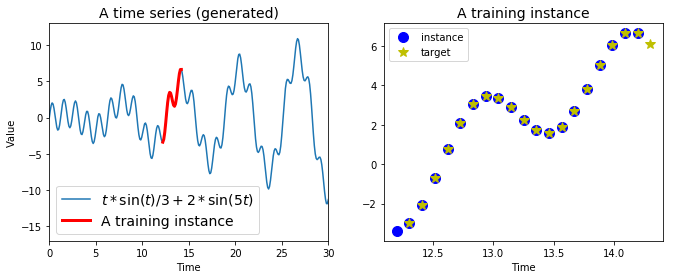

In [3]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t * \sin(t) / 3 + 2 * \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "r-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
# t_instance[:-1] 0~倒数第二个
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
# t_instance[1:] 1~最后一个
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")
# save_fig("time_series_plot")
plt.show()

In [ ]:
t.shape

In [ ]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

In [ ]:
np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]

In [ ]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

# 2. RNN Model
1. OuputProjectionWrapper
2. no OuputProjectionWrapper

In [4]:
tf.reset_default_graph() # RESET THE DEFAULT GRAPH USED ABOVE

In [5]:
n_steps = 20 # timestep
n_inputs = 1 # input vector dim for each time step
n_neurons = 100 # hidden state dim
n_outputs = 1 # output vector dim

In [6]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
# cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
# cell = tf.contrib.rnn.OutputProjectionWrapper(
#         tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu), 
#         output_size=n_outputs)
# outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs,
                                  activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [7]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [8]:
saver = tf.train.Saver()

In [9]:
n_iterations = 200000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 22.664808
100 	MSE: 19.968538
200 	MSE: 18.333864
300 	MSE: 17.81014
400 	MSE: 18.217716
500 	MSE: 19.131132
600 	MSE: 18.50907
700 	MSE: 17.416304
800 	MSE: 20.776329
900 	MSE: 21.365917
1000 	MSE: 20.22155
1100 	MSE: 17.148386
1200 	MSE: 17.236843
1300 	MSE: 20.254177
1400 	MSE: 18.316414
1500 	MSE: 16.305496
1600 	MSE: 13.675472
1700 	MSE: 18.440155
1800 	MSE: 15.721376
1900 	MSE: 14.079084
2000 	MSE: 16.10774
2100 	MSE: 14.5336075
2200 	MSE: 14.193406
2300 	MSE: 17.481926
2400 	MSE: 19.809572
2500 	MSE: 13.277902
2600 	MSE: 14.576249
2700 	MSE: 14.910093
2800 	MSE: 14.4677305
2900 	MSE: 14.507166
3000 	MSE: 14.65111
3100 	MSE: 13.484947
3200 	MSE: 12.898204
3300 	MSE: 17.593542
3400 	MSE: 17.044344
3500 	MSE: 14.252192
3600 	MSE: 12.511812
3700 	MSE: 14.4272995
3800 	MSE: 9.379579
3900 	MSE: 10.204072
4000 	MSE: 13.96492
4100 	MSE: 13.523332
4200 	MSE: 15.6800585
4300 	MSE: 11.826791
4400 	MSE: 13.685746
4500 	MSE: 10.32924
4600 	MSE: 10.005762
4700 	MSE: 9.26599
4800 	MSE:

38300 	MSE: 1.1166581
38400 	MSE: 1.3340412
38500 	MSE: 1.3492867
38600 	MSE: 1.30221
38700 	MSE: 1.162487
38800 	MSE: 1.0487623
38900 	MSE: 1.2152516
39000 	MSE: 1.0568855
39100 	MSE: 1.2095444
39200 	MSE: 1.083987
39300 	MSE: 1.1547595
39400 	MSE: 1.1674037
39500 	MSE: 1.0836604
39600 	MSE: 1.1888115
39700 	MSE: 1.0301337
39800 	MSE: 1.1910542
39900 	MSE: 0.93490857
40000 	MSE: 0.9004941
40100 	MSE: 1.2087137
40200 	MSE: 1.307456
40300 	MSE: 1.3151381
40400 	MSE: 0.90043163
40500 	MSE: 1.1878238
40600 	MSE: 1.0722902
40700 	MSE: 1.2041209
40800 	MSE: 1.0928938
40900 	MSE: 1.0764368
41000 	MSE: 1.1616709
41100 	MSE: 1.1431421
41200 	MSE: 0.9267069
41300 	MSE: 0.9434183
41400 	MSE: 1.0109235
41500 	MSE: 1.0628293
41600 	MSE: 1.248275
41700 	MSE: 1.067247
41800 	MSE: 1.0139717
41900 	MSE: 1.1045237
42000 	MSE: 1.1978128
42100 	MSE: 1.0164263
42200 	MSE: 1.2253991
42300 	MSE: 1.052259
42400 	MSE: 0.7947549
42500 	MSE: 1.0334458
42600 	MSE: 1.1020265
42700 	MSE: 1.0657876
42800 	MSE: 0.99

75100 	MSE: 0.5327506
75200 	MSE: 0.54264635
75300 	MSE: 0.58781326
75400 	MSE: 0.54124206
75500 	MSE: 0.51235425
75600 	MSE: 0.52311975
75700 	MSE: 0.531401
75800 	MSE: 0.553703
75900 	MSE: 0.6392992
76000 	MSE: 0.48295522
76100 	MSE: 0.46112156
76200 	MSE: 0.6504878
76300 	MSE: 0.43391147
76400 	MSE: 0.59355724
76500 	MSE: 0.50660026
76600 	MSE: 0.48954502
76700 	MSE: 0.5218861
76800 	MSE: 0.44300696
76900 	MSE: 0.5875258
77000 	MSE: 0.5014587
77100 	MSE: 0.50495726
77200 	MSE: 0.5424088
77300 	MSE: 0.5474254
77400 	MSE: 0.4359856
77500 	MSE: 0.46016577
77600 	MSE: 0.6057878
77700 	MSE: 0.58215505
77800 	MSE: 0.5762779
77900 	MSE: 0.5178815
78000 	MSE: 0.54779756
78100 	MSE: 0.44263273
78200 	MSE: 0.48589608
78300 	MSE: 0.49032694
78400 	MSE: 0.4617725
78500 	MSE: 0.49964622
78600 	MSE: 0.4808868
78700 	MSE: 0.47860688
78800 	MSE: 0.43174702
78900 	MSE: 0.61747324
79000 	MSE: 0.4658271
79100 	MSE: 0.56117445
79200 	MSE: 0.4796751
79300 	MSE: 0.5507107
79400 	MSE: 0.5185057
79500 	MSE

110900 	MSE: 0.32526055
111000 	MSE: 0.3388308
111100 	MSE: 0.2746635
111200 	MSE: 0.32657143
111300 	MSE: 0.32315218
111400 	MSE: 0.31687552
111500 	MSE: 0.33523518
111600 	MSE: 0.3412589
111700 	MSE: 0.341877
111800 	MSE: 0.2654685
111900 	MSE: 0.27276185
112000 	MSE: 0.2989187
112100 	MSE: 0.2918315
112200 	MSE: 0.2820787
112300 	MSE: 0.28551367
112400 	MSE: 0.26744545
112500 	MSE: 0.28105742
112600 	MSE: 0.24903344
112700 	MSE: 0.32821488
112800 	MSE: 0.30790544
112900 	MSE: 0.29118925
113000 	MSE: 0.30220655
113100 	MSE: 0.25710645
113200 	MSE: 0.35230657
113300 	MSE: 0.3095318
113400 	MSE: 0.2695423
113500 	MSE: 0.26643223
113600 	MSE: 0.29588744
113700 	MSE: 0.34931058
113800 	MSE: 0.32248834
113900 	MSE: 0.23671295
114000 	MSE: 0.2826447
114100 	MSE: 0.25765666
114200 	MSE: 0.32148513
114300 	MSE: 0.30532965
114400 	MSE: 0.29343715
114500 	MSE: 0.242172
114600 	MSE: 0.31808892
114700 	MSE: 0.29812646
114800 	MSE: 0.37533057
114900 	MSE: 0.3615517
115000 	MSE: 0.26402965
115100 

145400 	MSE: 0.14235209
145500 	MSE: 0.14209384
145600 	MSE: 0.17645663
145700 	MSE: 0.20048304
145800 	MSE: 0.18851972
145900 	MSE: 0.14488901
146000 	MSE: 0.16644788
146100 	MSE: 0.17585705
146200 	MSE: 0.22364911
146300 	MSE: 0.18892394
146400 	MSE: 0.18692319
146500 	MSE: 0.17859635
146600 	MSE: 0.17071396
146700 	MSE: 0.14970343
146800 	MSE: 0.18419242
146900 	MSE: 0.16855799
147000 	MSE: 0.2027999
147100 	MSE: 0.20511127
147200 	MSE: 0.16088241
147300 	MSE: 0.1980153
147400 	MSE: 0.14858207
147500 	MSE: 0.19889286
147600 	MSE: 0.2220993
147700 	MSE: 0.16191994
147800 	MSE: 0.16524185
147900 	MSE: 0.15340808
148000 	MSE: 0.20431036
148100 	MSE: 0.16116467
148200 	MSE: 0.14778295
148300 	MSE: 0.21511798
148400 	MSE: 0.20580111
148500 	MSE: 0.1615892
148600 	MSE: 0.16356762
148700 	MSE: 0.20568696
148800 	MSE: 0.19990627
148900 	MSE: 0.1788491
149000 	MSE: 0.17368832
149100 	MSE: 0.15787463
149200 	MSE: 0.1946748
149300 	MSE: 0.1815153
149400 	MSE: 0.172449
149500 	MSE: 0.17483462
1

179800 	MSE: 0.13035917
179900 	MSE: 0.1207823
180000 	MSE: 0.12148101
180100 	MSE: 0.12758106
180200 	MSE: 0.13689587
180300 	MSE: 0.115722336
180400 	MSE: 0.11901146
180500 	MSE: 0.11510757
180600 	MSE: 0.11445566
180700 	MSE: 0.11615922
180800 	MSE: 0.11276375
180900 	MSE: 0.10773855
181000 	MSE: 0.12784097
181100 	MSE: 0.12088052
181200 	MSE: 0.11197237
181300 	MSE: 0.10345328
181400 	MSE: 0.11238557
181500 	MSE: 0.11360471
181600 	MSE: 0.11953898
181700 	MSE: 0.11505449
181800 	MSE: 0.12479667
181900 	MSE: 0.10339679
182000 	MSE: 0.11486165
182100 	MSE: 0.12222986
182200 	MSE: 0.1096338
182300 	MSE: 0.12448854
182400 	MSE: 0.113344245
182500 	MSE: 0.13283694
182600 	MSE: 0.12571082
182700 	MSE: 0.108056
182800 	MSE: 0.10190557
182900 	MSE: 0.13646549
183000 	MSE: 0.14636096
183100 	MSE: 0.11480435
183200 	MSE: 0.118814334
183300 	MSE: 0.11046459
183400 	MSE: 0.115347765
183500 	MSE: 0.1182068
183600 	MSE: 0.10110079
183700 	MSE: 0.1262198
183800 	MSE: 0.11226857
183900 	MSE: 0.105

In [10]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


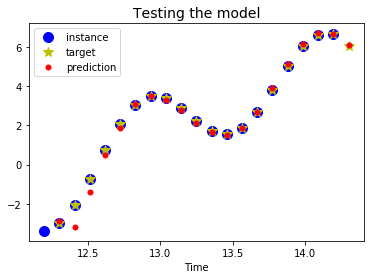

In [11]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

# 3. Generating a creative new sequence


In [12]:
with tf.Session() as sess:                        # not shown in the book
    saver.restore(sess, "./my_time_series_model") # not shown

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


INFO:tensorflow:Restoring parameters from ./my_time_series_model


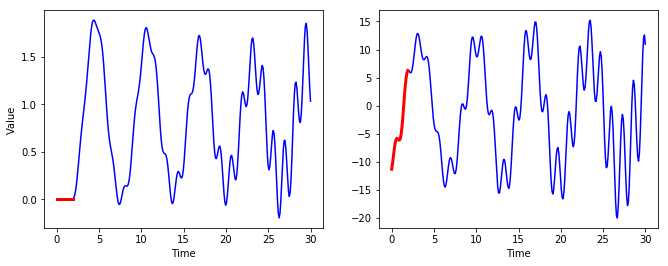

In [13]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "r-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "r-", linewidth=3)
plt.xlabel("Time")

plt.show()